In [88]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [89]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ['2024-04-26-15-30-10', '2024-04-25-19-54-41', '2024-04-25-21-23-45', '2024-04-26-09-48-53','2024-04-26-11-22-32']
filters = {"tags": {"$in": tags}, "state": "finished", "config.use_visit_count": True}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [90]:
# crete a dataframe from runs and summary metrics
# async def add_max_to_summary(run):
#     try:
#         history: pd.DataFrame = run.history()
#         # get the row with the highest Self_Play/Mean_Reward
#         metric = "Self_Play/Mean_Reward"
#         best_row = history.loc[history[metric].idxmax()]
#         run.summary[f'max_{metric}'] = best_row[metric]
#         run.summary[f'max_{metric}_step'] = best_row['_step']
#         run.summary.update()
#     except:
#         pass



# async def get_history(run):
#     return await run.history()

# tasks = []
# for run in runs:
#     if run.state != "finished":
#         continue
#     tasks.append(add_max_to_summary(run))

# await asyncio.gather(*tasks)


data = []
for run in tqdm(runs):
    history: pd.DataFrame = run.history()
    for i, row in history.iterrows():
        # add a row to the data with run.config and the history row merged
        data.append({**run.config, **row})

df = pd.DataFrame(data)

df


100%|██████████| 60/60 [00:33<00:00,  1.78it/s]


,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Self_Play/EMA_Discounted_Return,Training/Policy_loss,Evaluation/Mean_Returns,Training/Replay_Buffer_Size,Self_Play/Mean_Return,_timestamp,Evaluation/Mean_Entropy,Training/Value_loss,Self_Play/Min_Timesteps,Evaluation/Mean_Discounted_Returns
0,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-100.000000,1.384422,-100.0,6,-100.000000,1.714139e+09,0.893059,8.780326,100,-100.0
1,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-100.000000,1.381695,NaN,12,-100.000000,1.714139e+09,NaN,8.953991,100,NaN
2,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-100.000000,1.380756,NaN,18,-100.000000,1.714139e+09,NaN,8.928272,100,NaN
3,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-100.000000,1.378678,NaN,24,-100.000000,1.714139e+09,NaN,8.763802,100,NaN
4,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-100.000000,1.377370,NaN,30,-100.000000,1.714139e+09,NaN,8.795136,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-18.953726,1.278275,-15.0,90,-15.833333,1.714069e+09,0.121100,78.646822,15,-15.0
1796,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-18.117608,1.244420,NaN,90,-16.166666,1.714069e+09,NaN,63.458616,15,NaN
1797,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-17.382326,1.176704,NaN,90,-15.666667,1.714069e+09,NaN,56.579139,15,NaN
1798,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-16.817628,1.075056,NaN,90,-15.500000,1.714069e+09,NaN,47.124657,15,NaN


In [91]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Self_Play/Total_Mean_Discounted_Return',
       'Evaluation/Timesteps', 'Self_Play/Entropies',
       'Self_Play/Discounted_Return', 'Self_Play/Mean_Timesteps',
       'Evaluation/Entropies', 'Evaluation/Returns', 'Self_Pl

In [92]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [93]:
episode_max = df['episodes'].max()
# if episodes is Nan, set it to episode_max
df['episodes'] = df['episodes'].fillna(episode_max)

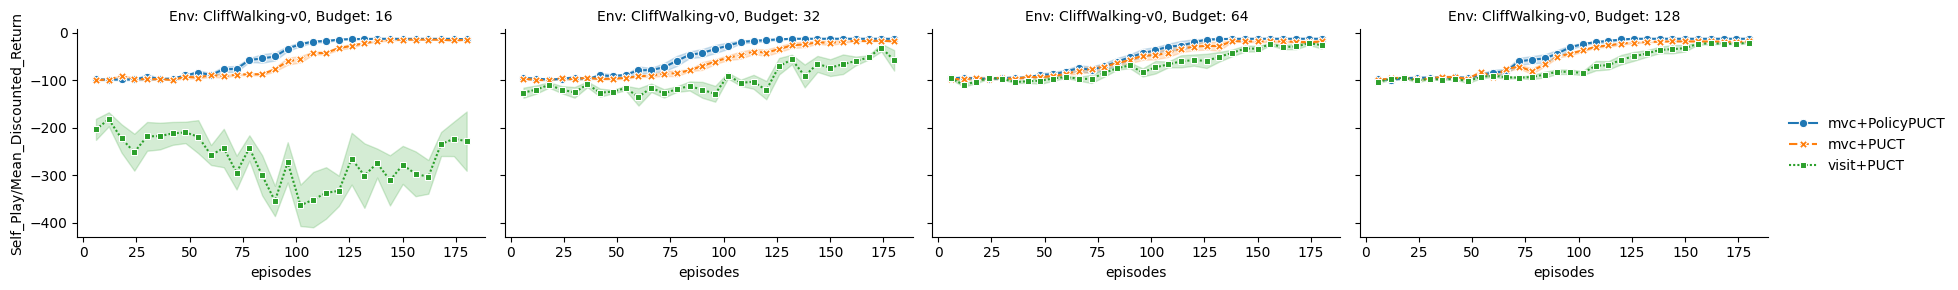

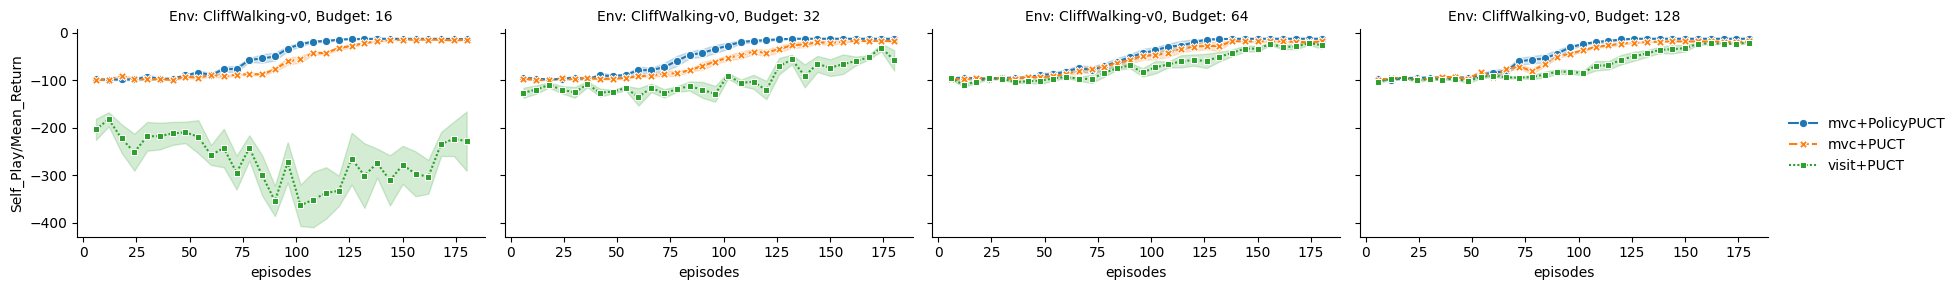

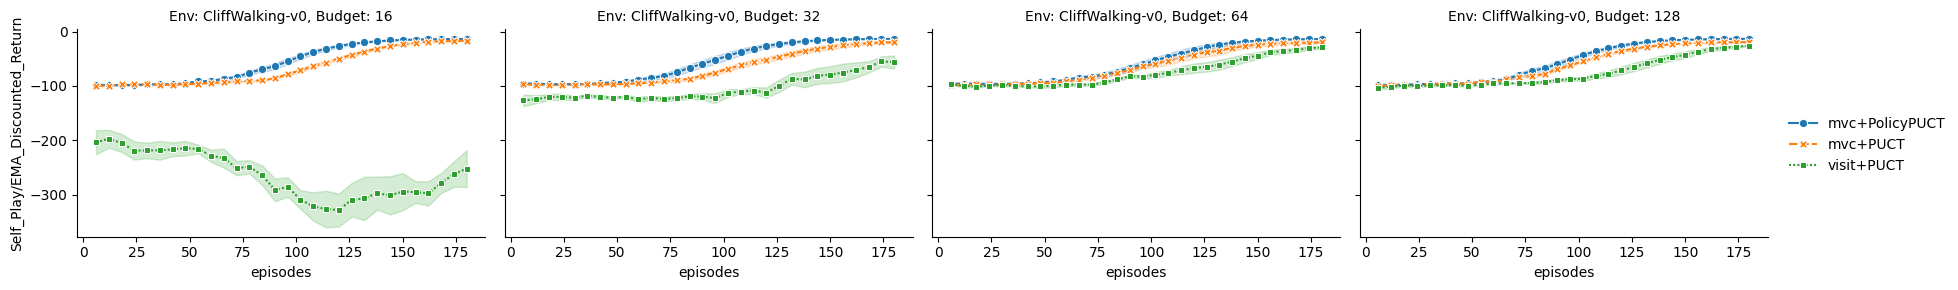

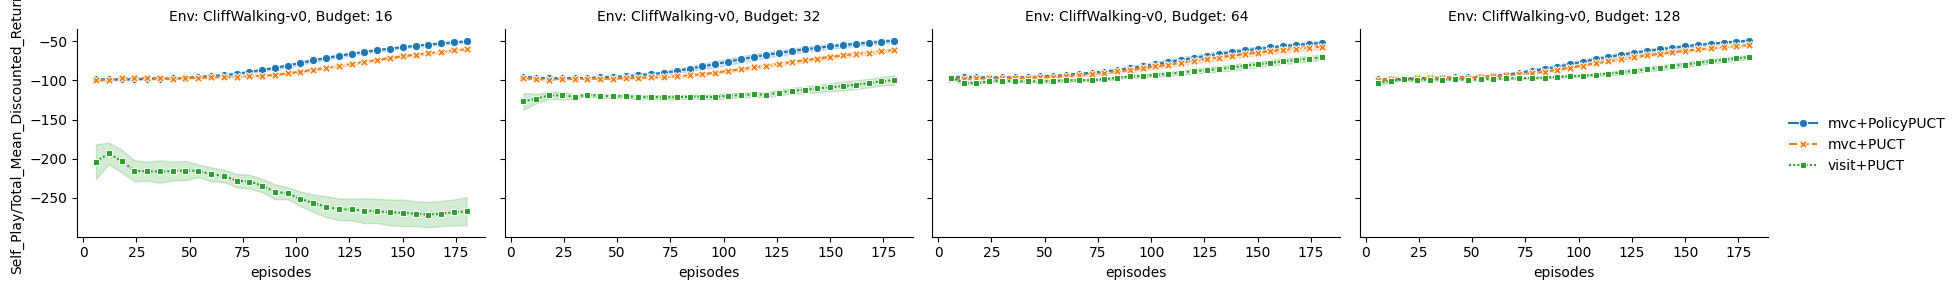

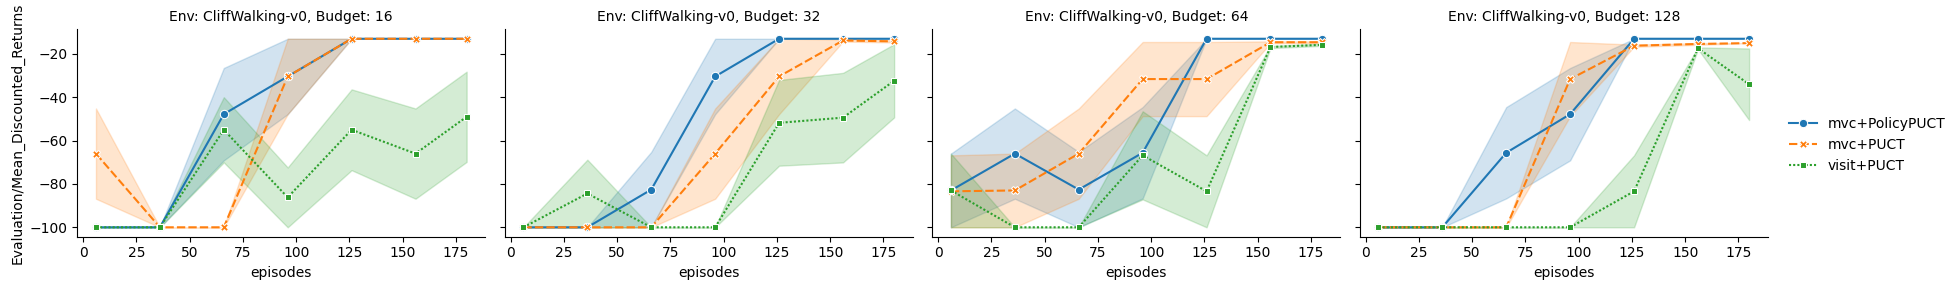

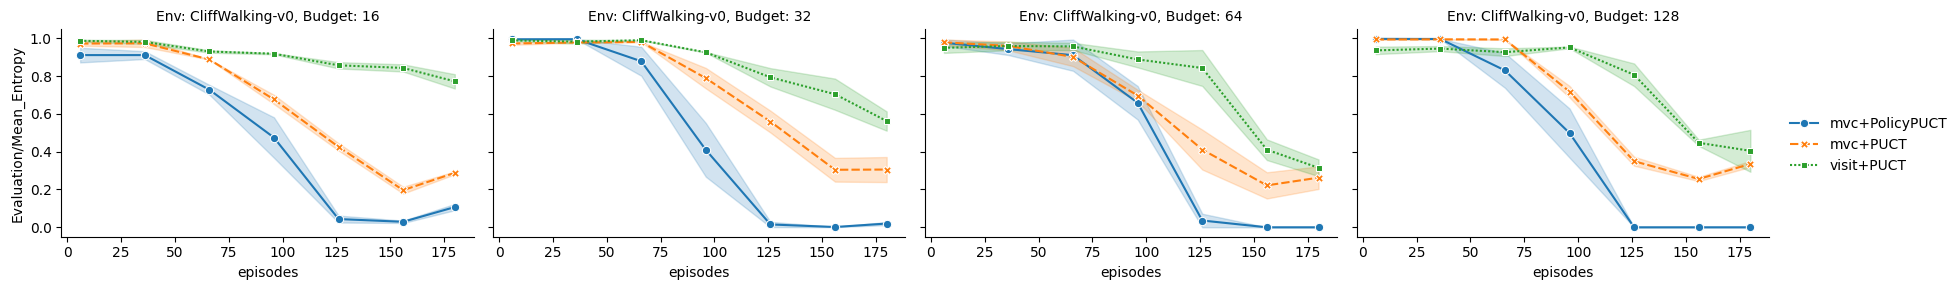

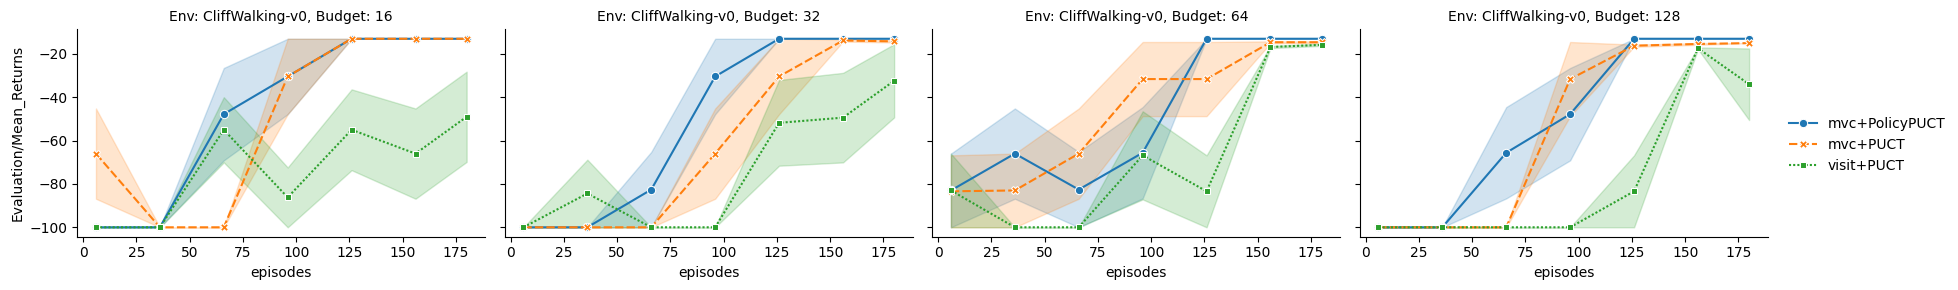

In [94]:





df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]
x_metric = "episodes"

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed


    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("Env: {row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.show()

In [95]:
max_episode_length = df["max_episode_length"].max()
max_episode_length

100

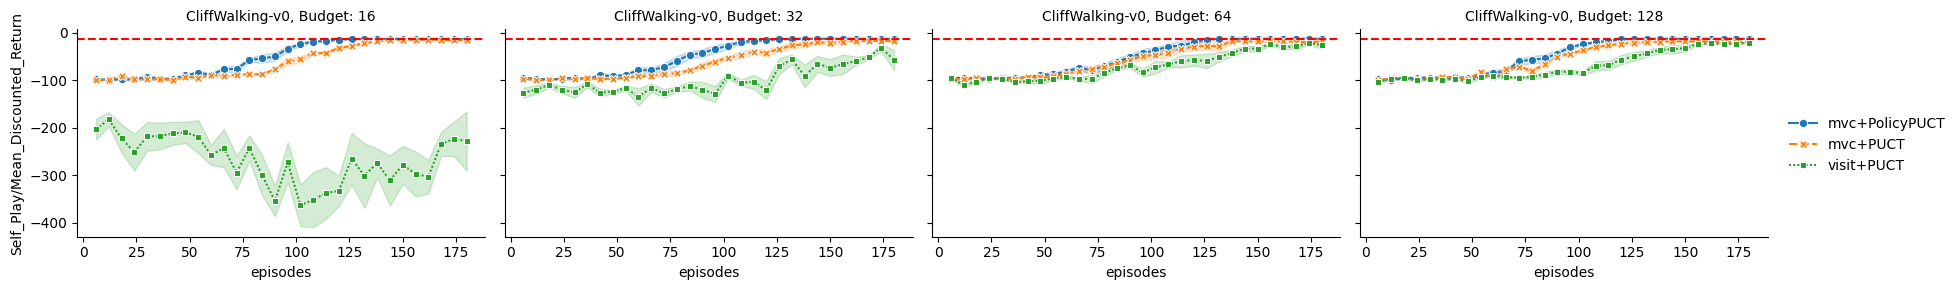

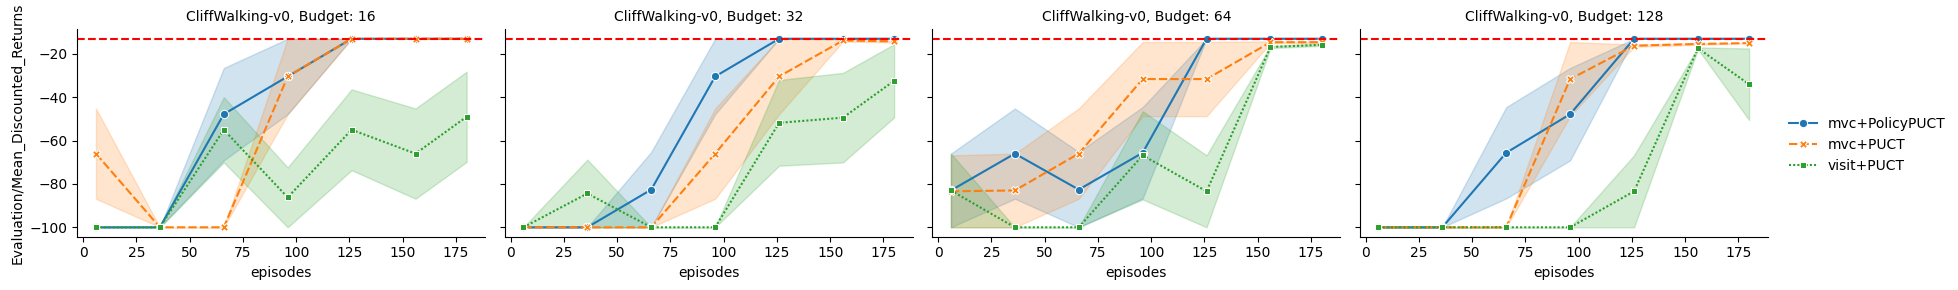

In [96]:


env_description = "CliffWalking-v0"
runs = df[df["env_description"] == env_description]
optimum_value = runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot

    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("{row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()


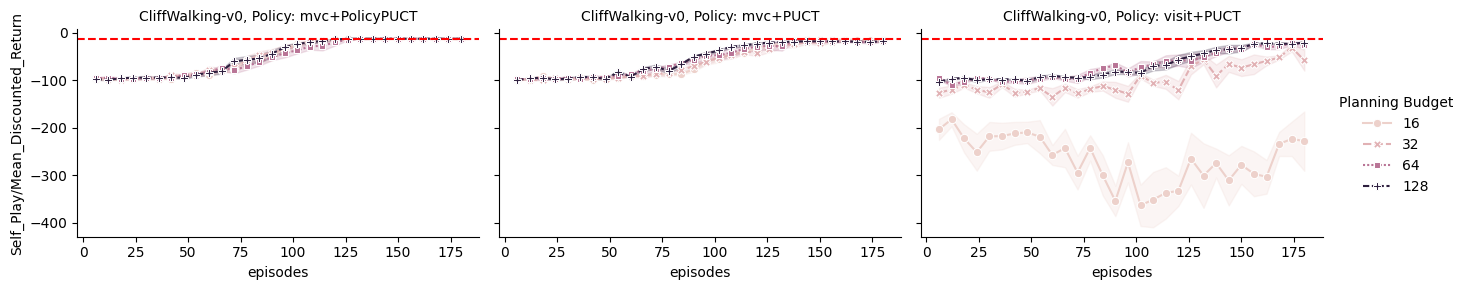

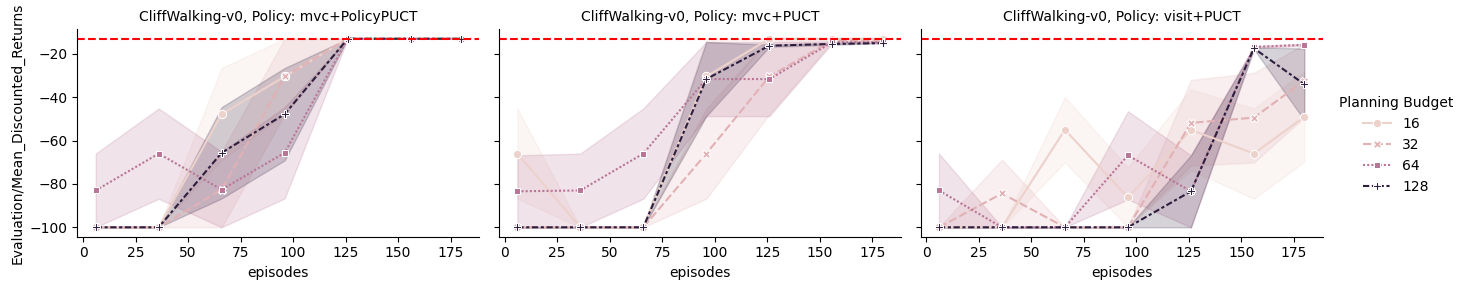

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'metrics' are already defined and loaded properly

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'policy_combination'
    g = sns.FacetGrid(data=df, row="env_description", col="policy_combination", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="planning_budget", style="planning_budget",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend(title="Planning Budget")
    g.set_titles("{row_name}, Policy: {col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()


In [97]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Self_Play/Total_Mean_Discounted_Return',
       'Evaluation/Timesteps', 'Self_Play/Entropies',
       'Self_Play/Discounted_Return', 'Self_Play/Mean_Timesteps',
       'Evaluation/Entropies', 'Evaluation/Returns', 'Self_Pl

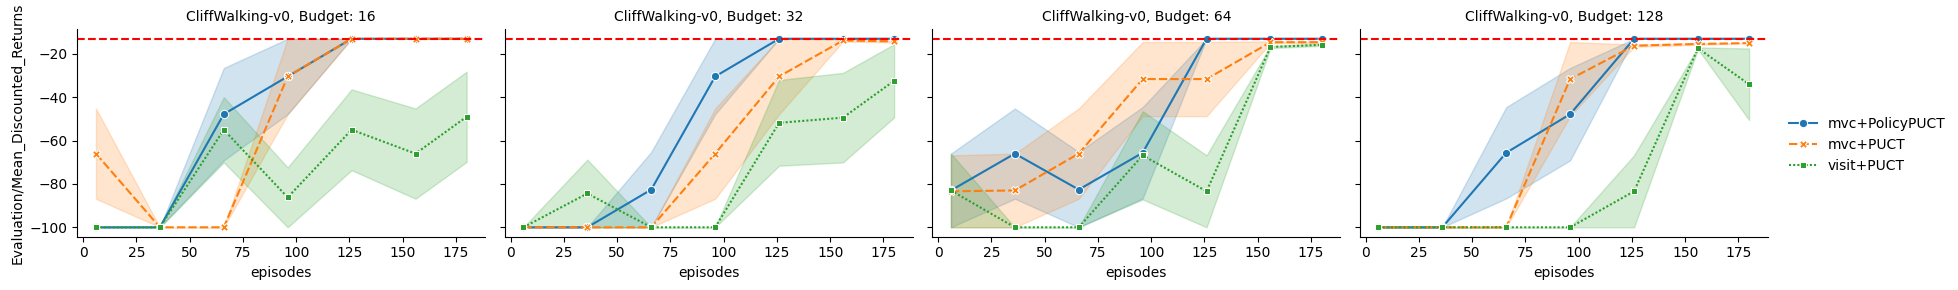

In [98]:
metric = "Evaluation/Mean_Discounted_Returns"
max_episode_length = 100
estimator = "mean"

# Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
# Note: adjust size and aspect to fit your data and preference
g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

# Step 2: Use map_dataframe to draw the lineplots on each subplot
# Pass sns.lineplot as the plotting function and its arguments
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

# add a horizontal line for the optimal value to each subplot

for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")



# Step 3: Adjusting aesthetics (optional)
# Adding a legend
g.add_legend()
g.set_titles("{row_name}, Budget: {col_name}")

# Adjust the labels/titles as needed
g.set_axis_labels(x_metric, metric)


plt.show()

In [99]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', 'Self_Play/Total_Mean_Discounted_Return',
       'Evaluation/Timesteps', 'Self_Play/Entropies',
       'Self_Play/Discounted_Return', 'Self_Play/Mean_Timesteps',
       'Evaluation/Entropies', 'Evaluation/Returns', 'Self_Pl

In [100]:
eval_data = df[df["Evaluation/Trajectories"].notnull()].copy()
eval_data[["episodes", "Evaluation/Trajectories"]]

,episodes,Evaluation/Trajectories
0,6,"[[60, 48, 49, 48, 49, 48, 49, 48, 49, 48, 49, ..."
5,36,"[[60, 48, 49, 48, 49, 48, 49, 48, 49, 48, 49, ..."
10,66,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
15,96,"[[60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, ..."
20,126,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
...,...,...
1780,66,"[[60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, ..."
1785,96,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 44, ..."
1790,126,"[[60, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, ..."
1795,156,"[[60, 48, 36, 37, 38, 39, 40, 41, 42, 43, 44, ..."


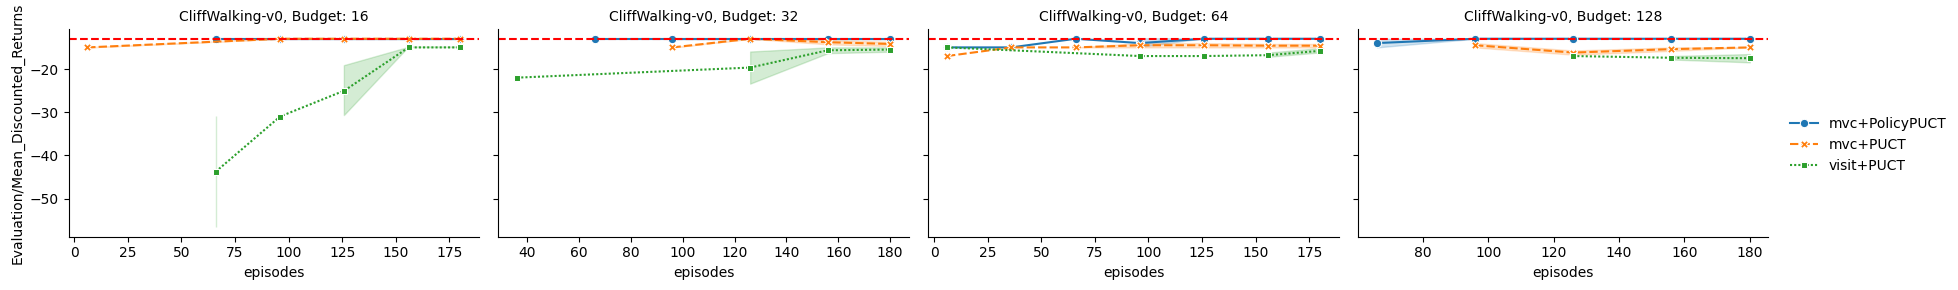

In [101]:
# eval_data only if Evaluation/Trajectories is not None
eval_data['max_length_reached'] = eval_data['Evaluation/Trajectories'].apply(lambda x: len(x[0]) == max_episode_length)

# Filtered DataFrame for plotting without the max_length_reached datapoints
filtered_df = eval_data[~eval_data['max_length_reached']]


# Set up the FacetGrid using the filtered DataFrame
g = sns.FacetGrid(data=filtered_df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

# Adding the optimal value horizontal line
for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")

# Adjust aesthetics and add legend
g.add_legend()
g.set_titles("{row_name}, Budget: {col_name}")
g.set_axis_labels(x_metric, metric)


In [102]:
filtered_df

,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Evaluation/Mean_Returns,Training/Replay_Buffer_Size,Self_Play/Mean_Return,_timestamp,Evaluation/Mean_Entropy,Training/Value_loss,Self_Play/Min_Timesteps,Evaluation/Mean_Discounted_Returns,policy_combination,max_length_reached
10,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,66,-86.833336,1.714140e+09,0.691270,8.584666,68,-13.0,mvc+PolicyPUCT,False
20,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,90,-13.500000,1.714140e+09,0.043634,48.648852,13,-13.0,mvc+PolicyPUCT,False
25,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,90,-13.333333,1.714140e+09,0.017438,92.195213,13,-13.0,mvc+PolicyPUCT,False
29,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,90,-13.666667,1.714140e+09,0.088954,23.605753,13,-13.0,mvc+PolicyPUCT,False
30,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-15.0,6,-100.000000,1.714139e+09,0.944106,8.684845,100,-15.0,mvc+PUCT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,90,-13.000000,1.714069e+09,0.032921,7.769944,13,-13.0,mvc+PolicyPUCT,False
1785,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-15.0,90,-48.166668,1.714069e+09,0.639875,14.527626,32,-15.0,mvc+PUCT,False
1790,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-13.0,90,-21.166666,1.714069e+09,0.480067,69.185674,15,-13.0,mvc+PUCT,False
1795,12,2,2,1,1,2.5,0,"{'id': 'CliffWalking-v0', 'max_episode_steps':...",1,64,...,-15.0,90,-15.833333,1.714069e+09,0.121100,78.646822,15,-15.0,mvc+PUCT,False


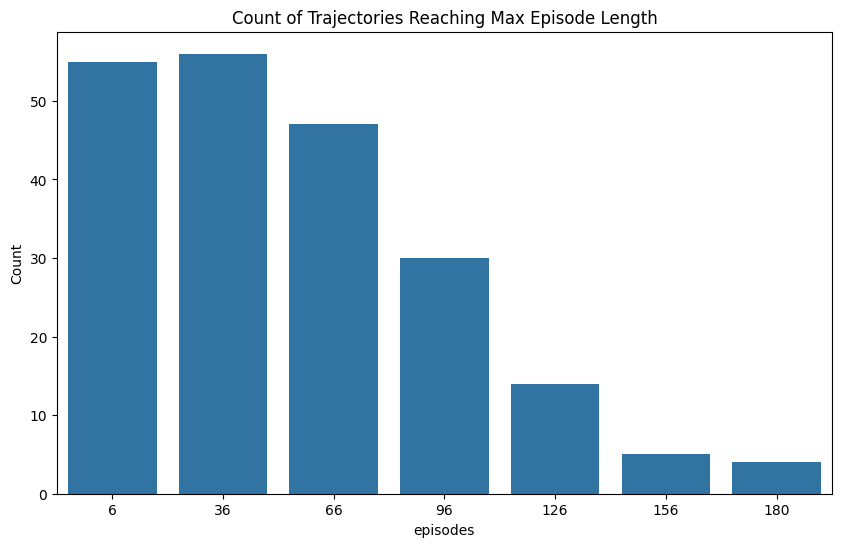

In [103]:
# Aggregate the data to count how many reach the max episode length at each x_metric
aggregated_data = eval_data.groupby(x_metric)['max_length_reached'].sum().reset_index()

# Create a new figure for the additional plot
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x=x_metric, y='max_length_reached')
plt.title('Count of Trajectories Reaching Max Episode Length')
plt.ylabel('Count')
plt.xlabel(x_metric)
plt.show()


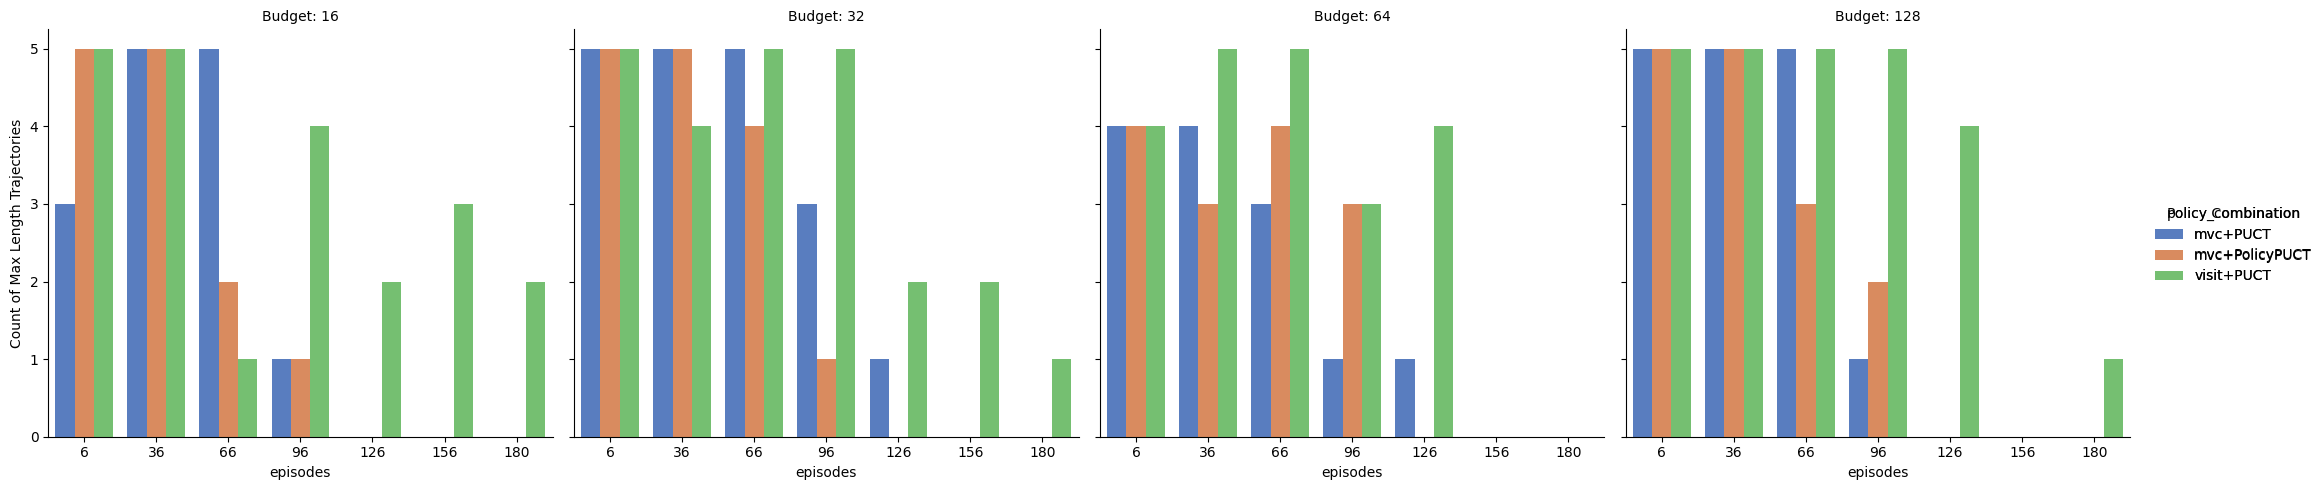

In [104]:
# Adjusting the code to group by x_metric, policy_combination, and planning_budget
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].sum().reset_index()

# Create a faceted bar plot using seaborn's catplot
g = sns.catplot(
    data=aggregated_data,
    kind="bar",
    x=x_metric,
    y='max_length_reached',
    hue='policy_combination',
    col='planning_budget',
    palette='muted',
)

g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")
g.add_legend(title="Policy Combination")
plt.show()


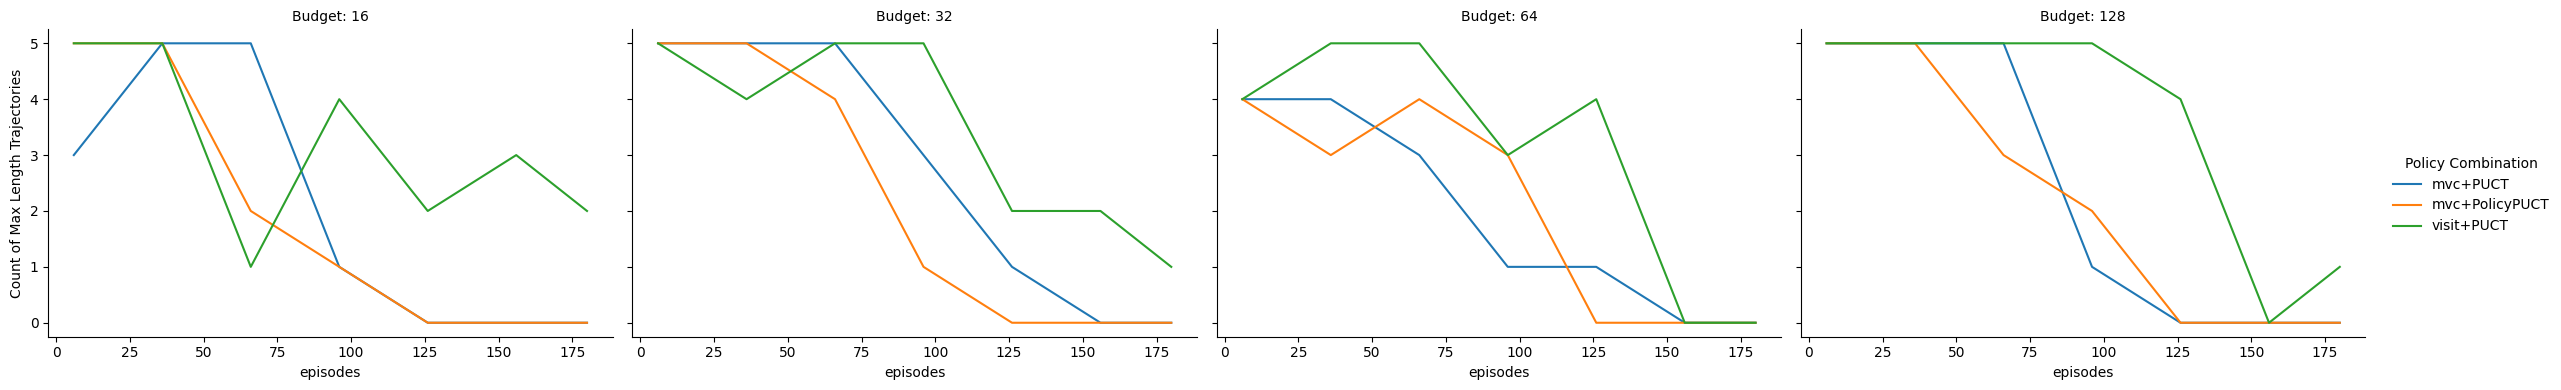

In [105]:
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination", col_wrap=4, height=4, aspect=1.5)

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'max_length_reached')

# Adding customizations
g.add_legend(title="Policy Combination")
g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")

plt.show()


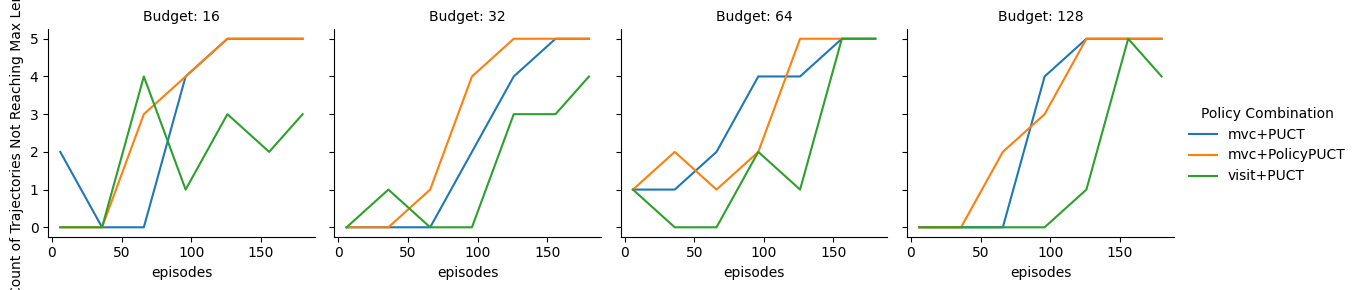

In [106]:
# Assume 'df' is your DataFrame, and you have already added the 'max_length_reached' column
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].apply(lambda x: (x == False).sum()).reset_index()
aggregated_data.rename(columns={'max_length_reached': 'count_not_reached'}, inplace=True)
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination")

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'count_not_reached')

# Adding customizations
g.add_legend(title="Policy Combination")
g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Trajectories Not Reaching Max Length")

plt.show()
